# Import necessary libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets
import joblib

# Load input data

In [2]:
input_file = 'data.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1].astype(int)

# Plot input data

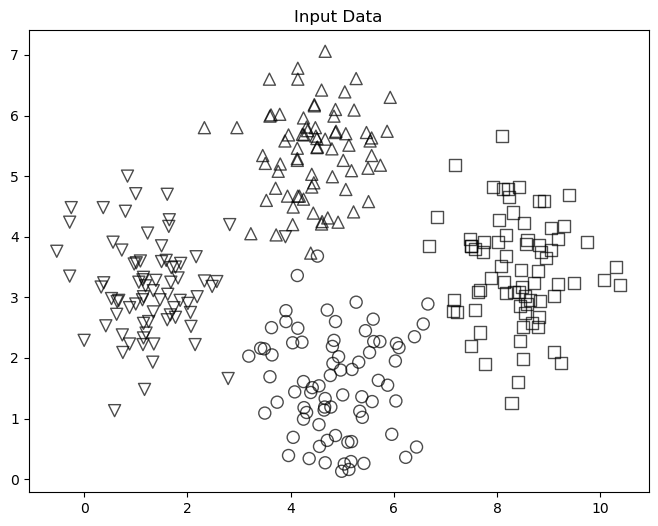

In [3]:
plt.figure(figsize=(8, 6))
plt.title('Input Data')
marker_shapes = 'v^os'
mapper = [marker_shapes[i] for i in y]

for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], s=75, 
                edgecolors='black', facecolors='none', alpha=0.7)
plt.show();

# Set number of nearest neighbors

In [4]:
num_neighbors = 12
step_size = 0.01

# Create and train the KNN classifier

In [5]:
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance')
classifier.fit(X, y)

KNeighborsClassifier(n_neighbors=12, weights='distance')

# Create a mesh grid for decision boundary

In [6]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size),
                                 np.arange(y_min, y_max, step_size))


# Evaluate the classifier on the grid

In [7]:
output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
output = output.reshape(x_values.shape)

# Plot decision boundaries

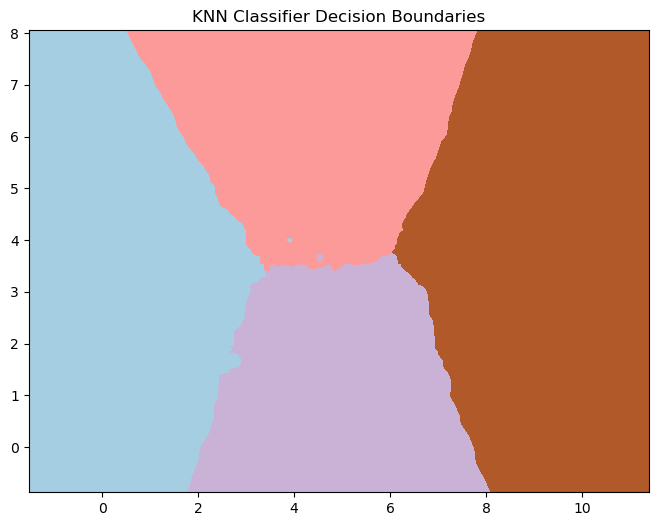

In [8]:
plt.figure(figsize=(8, 6))
plt.title('KNN Classifier Decision Boundaries')
plt.pcolormesh(x_values, y_values, output, cmap=cm.Paired, shading='auto');

# Overlay the training points

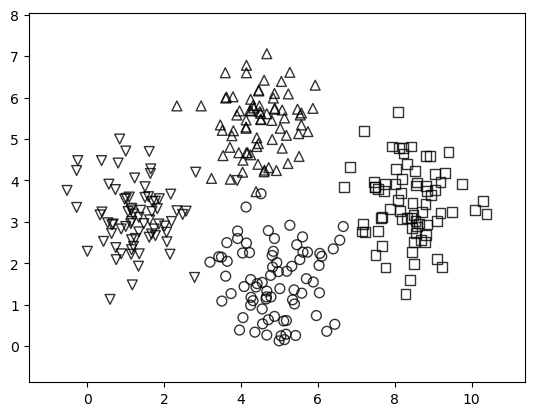

In [9]:
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], s=50, 
                edgecolors='black', facecolors='none', alpha=0.8)

plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())
plt.show();

# Test input data point

In [10]:
test_data_point = [5.1, 3.6]

# Plot test data point

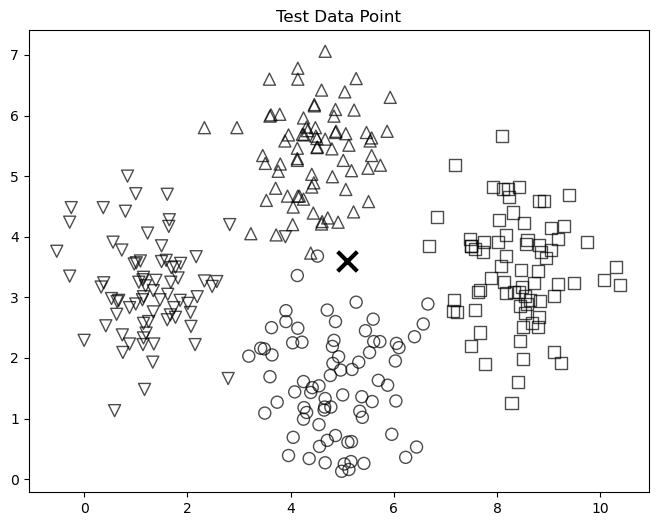

In [11]:
plt.figure(figsize=(8, 6))
plt.title('Test Data Point')
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], s=75, 
                edgecolors='black', facecolors='none', alpha=0.7)
plt.scatter(test_data_point[0], test_data_point[1], marker='x', 
            linewidths=3, s=200, color='black')
plt.show();

# Extract and plot the K nearest neighbors

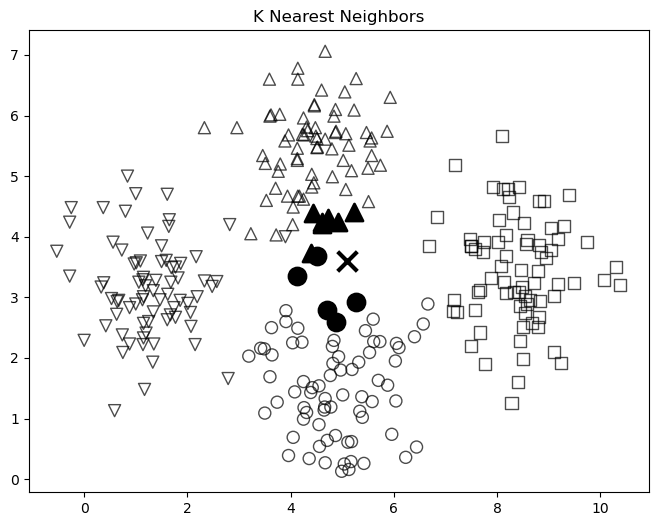

In [12]:
_, indices = classifier.kneighbors([test_data_point])
indices = indices[0]

plt.figure(figsize=(8, 6))
plt.title('K Nearest Neighbors')
for i in indices:
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[y[i]], 
                linewidths=2, s=150, color='black')

plt.scatter(test_data_point[0], test_data_point[1], marker='x', 
            linewidths=3, s=200, color='black')

for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], s=75, 
                edgecolors='black', facecolors='none', alpha=0.7)

plt.show();

# Print the predicted output

In [13]:
predicted_class = classifier.predict([test_data_point])[0]
print(f"Predicted output: {predicted_class}")

Predicted output: 1


In [14]:
# Predicted output: 1

# Export Model

In [16]:
joblib.dump(knn_model, "knn_model.pkl")
print("KNN model exported as 'knn_model.pkl'")

NameError: name 'knn_model' is not defined